## Imports

In [16]:
# necessary imports
import random
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf

# import albumentations as A
# https://albumentations.ai/docs/examples/tensorflow-example/
from albumentations import (
    Compose, RandomBrightness, JpegCompression, HueSaturationValue, RandomContrast, HorizontalFlip,
    Rotate
)

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Hyperparameter Setting

In [8]:
CFG = {
    'FPS' : 30,
    'IMG_SIZE': 128,
    'EPOCHS': 10,
    'LEARNING_RATE': 3e-4,
    'BATCH_SIZE': 4,
    'SEED': 41
}

## Fixed RandomSeed

In [9]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # SEED 고정
    

## Data Load

In [10]:
df = pd.read_csv('./data/train.csv')

In [11]:
df.head()

,id,path,label
0,TRAIN_000,./train/TRAIN_000.mp4,3
1,TRAIN_001,./train/TRAIN_001.mp4,0
2,TRAIN_002,./train/TRAIN_002.mp4,1
3,TRAIN_003,./train/TRAIN_003.mp4,4
4,TRAIN_004,./train/TRAIN_004.mp4,4


In [18]:
df['label'].value_counts()

3    133
1    129
2    121
4    114
0    113
Name: label, dtype: int64

### train 데이터 label 분포

In [19]:
df['label'].value_counts().values

array([133, 129, 121, 114, 113])

([<matplotlib.patches.Wedge at 0x2d02c6dc0>,
 [Text(0.8518816777434608, 0.6959149424498562, '3'),
  Text(-0.49180322740623394, 0.9839357628995972, '1'),
  Text(-1.0821777337152425, -0.1972089061146626, '2'),
  Text(-0.1972087541334739, -1.082177761411277, '4'),
  Text(0.9189213344776592, -0.6046350808891245, '0')],
 [Text(0.46466273331461494, 0.3795899686090124, '21.8%'),
  Text(-0.26825630585794574, 0.5366922343088711, '21.1%'),
  Text(-0.5902787638446777, -0.10756849424436142, '19.8%'),
  Text(-0.10756841134553122, -0.5902787789516056, '18.7%'),
  Text(0.5012298188059958, -0.3298009532122497, '18.5%')])

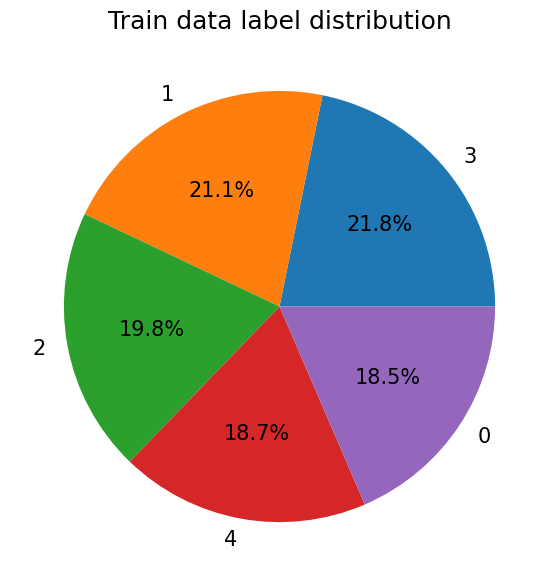

In [23]:
mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))

label = ['3', '1', '2', '4', '0'] # 타깃값 레이블
plt.title('Train data label distribution')
plt.pie(df['label'].value_counts().values, labels=label, autopct='%.1f%%')


In [24]:
test = pd.read_csv('./data/test.csv')

In [26]:
test.head()

,id,path
0,TEST_000,./test/TEST_000.mp4
1,TEST_001,./test/TEST_001.mp4
2,TEST_002,./test/TEST_002.mp4
3,TEST_003,./test/TEST_003.mp4
4,TEST_004,./test/TEST_004.mp4


## Train/ Validation Split

In [27]:
train, val, _, _ = train_test_split(df, df['label'], test_size=0.2, stratify=df['label'], random_state=CFG['SEED'])

In [28]:
train.shape, val.shape

((488, 3), (122, 3))

## CustomDataset